In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
import os
base_dir = 'Garbage'
test_dir = 'test'

In [3]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 2527


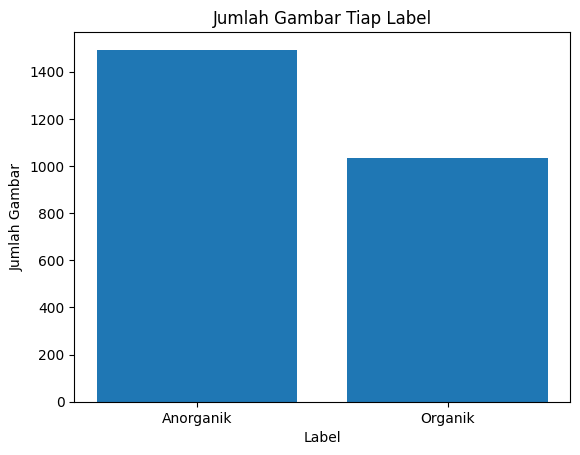

In [4]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

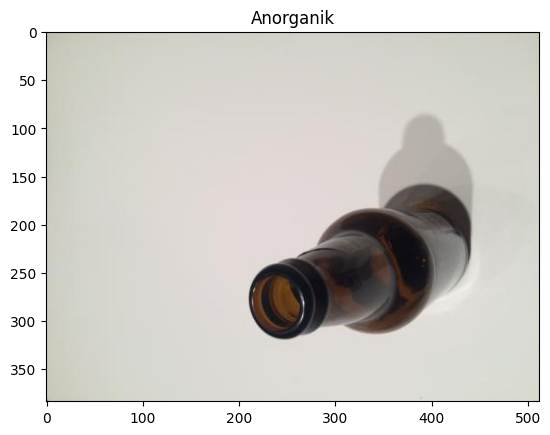

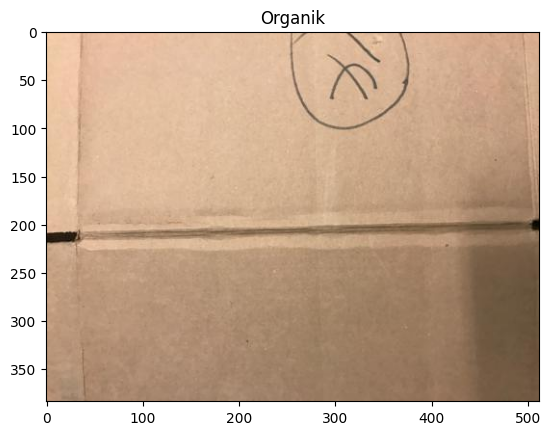

In [5]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [6]:
# Membuat arsitektur model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Mengompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Membuat objek ImageDataGenerator untuk augmentation dan preprocessing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Memuat dataset training dan testing menggunakan ImageDataGenerator
training_set = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2527 images belonging to 2 classes.
Found 2527 images belonging to 2 classes.


In [10]:
# Melatih model menggunakan dataset training
history = model.fit(
    training_set,
    epochs=20,
    validation_data=test_set
)

Epoch 1/20
79/79 [==============================] - 215s 3s/step - loss: 0.6598 - accuracy: 0.6173 - val_loss: 0.6010 - val_accuracy: 0.6818
Epoch 2/20
79/79 [==============================] - 64s 804ms/step - loss: 0.5752 - accuracy: 0.7000 - val_loss: 0.5275 - val_accuracy: 0.7289
Epoch 3/20
79/79 [==============================] - 31s 388ms/step - loss: 0.5368 - accuracy: 0.7234 - val_loss: 0.6132 - val_accuracy: 0.6640
Epoch 4/20
79/79 [==============================] - 30s 380ms/step - loss: 0.5264 - accuracy: 0.7281 - val_loss: 0.4742 - val_accuracy: 0.7574
Epoch 5/20
79/79 [==============================] - 30s 383ms/step - loss: 0.4749 - accuracy: 0.7732 - val_loss: 0.4554 - val_accuracy: 0.7721
Epoch 6/20
79/79 [==============================] - 31s 389ms/step - loss: 0.4568 - accuracy: 0.7780 - val_loss: 0.4276 - val_accuracy: 0.7994
Epoch 7/20
79/79 [==============================] - 33s 423ms/step - loss: 0.4489 - accuracy: 0.7871 - val_loss: 0.4451 - val_accuracy: 0.7950
E

In [11]:
# Evaluasi akurasi model pada dataset testing
accuracy = model.evaluate(test_set)[1]
print("Akurasi: {:.2f}%".format(accuracy * 100))


79/79 [==============================] - 11s 131ms/step - loss: 0.2930 - accuracy: 0.8789
Akurasi: 87.89%


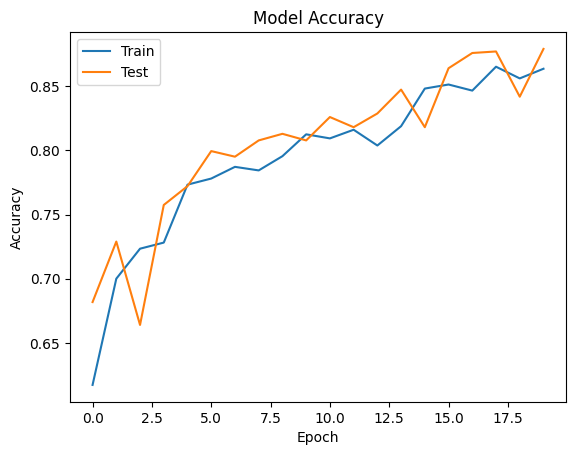

In [12]:
# Plot grafik epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

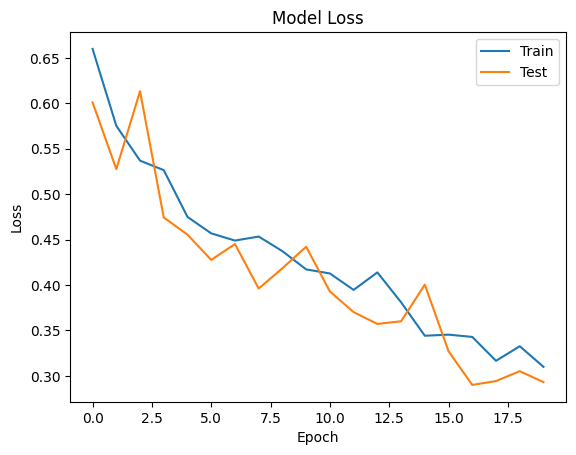

In [13]:
# Plot grafik akurasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [14]:
# Menyimpan model dalam format HDF5
model.save('CNNmodel.h5')
print("Model telah disimpan.")

Model telah disimpan.


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.feature_extraction import image as sk_image
from sklearn.metrics.pairwise import euclidean_distances
import cv2
import pandas as pd

In [16]:
# Memuat model yang telah dilatih sebelumnya
model = load_model('CNNmodel.h5')

In [35]:
def classify_image(img_path):
    # Memuat model yang telah dilatih sebelumnya
    model = load_model('CNNmodel.h5')
    img = image.load_img(img_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalisasi piksel gambar

    result = model.predict(img)
    if result[0][0] < 0.5:
        classification = "Anorganik"
    else:
        classification = "Organik"
    
    # Mengambil salah satu gambar dari dataset training sebagai template
    template_img_path = img_samples[classification]
    template_img = plt.imread(template_img_path)

    # Deteksi template menggunakan feature matching
 #   match = detect_template(img[0], template_img)
    
     # Menampilkan hasil deteksi template
#    if match:
#       plt.imshow(img[0])
#        plt.title('Deteksi Template')
#        plt.axis('off')
#        plt.show()
#        print("Template ditemukan pada gambar.")
#    else:
#        print("Template tidak ditemukan pada gambar.")

#     # Menampilkan analisis
#    distances = euclidean_distances(des1, des2)
#    df = pd.DataFrame(distances, columns=['Distance'])
#    df.index.name = 'Keypoint'
#    df = df.reset_index()
#    print(df)

    # Plot grafik analisis
 #   plt.plot(df['Distance'])
 #   plt.title('Euclidean Distance Analysis')
 #   plt.ylabel('Distance')
 #   plt.xlabel('Keypoint')
 #   plt.show()

    return classification

1/1 [==============================] - 2s 2s/step
Hasil klasifikasi:  Organik


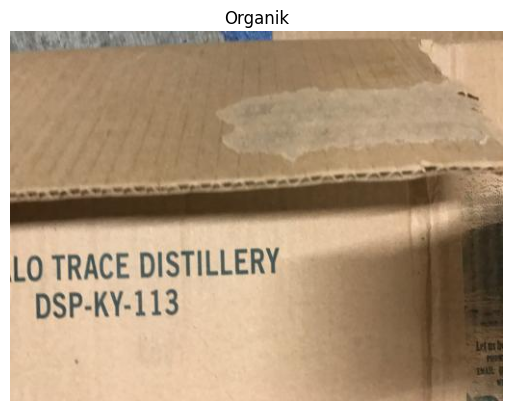

In [38]:
# Uji coba dengan mengunggah foto
file_path = input("Masukkan path foto: ")
result = classify_image(file_path)
print("Hasil klasifikasi: ", result)

# Menampilkan foto yang diinput
img_input = plt.imread(file_path)
plt.imshow(img_input)
plt.title(result)
plt.axis('off')
plt.show()

In [39]:
# Baca dua gambar yang akan dibandingkan
img1 = cv2.imread(file_path, 0)
fmatching = input("Masukkan path ("+result+"): ")
img2 = cv2.imread(fmatching, 0)

In [40]:
# Inisialisasi detektor fitur (SIFT)
sift = cv2.xfeatures2d.SIFT_create()

# Temukan titik-titik kunci dan deskripsi pada kedua gambar
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [41]:
# Inisialisasi matcher (Brute-Force)
bf = cv2.BFMatcher()

In [42]:
# Temukan padanan fitur antara dua gambar
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [43]:
# Terapkan perbandingan Lowe's ratio untuk memfilter padanan yang kurang akurat
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


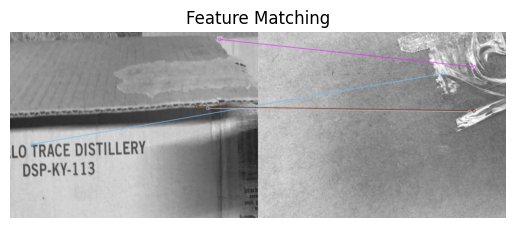

In [48]:
# Gambar hasil padanan fitur
result_fm = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)

# Konversi citra OpenCV (BGR) ke citra Matplotlib (RGB)
result_rgb = cv2.cvtColor(result_fm, cv2.COLOR_BGR2RGB)

# Tampilkan gambar hasil menggunakan Matplotlib
plt.imshow(result_rgb)
plt.title("Feature Matching")
plt.axis('off')
plt.show()